<a href="https://colab.research.google.com/github/emigambarte/DataScience1_CoderHouse/blob/main/GambarteEmiliano_DataScience_synthetic_heart_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Proyecto Final - Data Science - Gambarte Emiliano

# 1 Descripción y Objetivo del Proyecto

## 1.1 Descripción
## Dataset: **Synthetic Mental Health**

El siguiente proyecto tiene como objetivo analizar los factores asociados al bienestar mental de una población de pacientes, a partir de un conjunto de datos sobre salud mental. El dataset contiene información de personas entre 18 y 70 años, con variables como nivel de estrés, ansiedad, asistencia a terapia, diagnóstico previo y año de registro.

A lo largo del análisis se pretende identificar relaciones entre variables como la edad, el nivel de ansiedad y la asistencia a terapia, con el fin de comprender cómo influyen en el bienestar general.

Este proyuecto busca, en última instancia, ofrecer una base interpretativa que ayude a predecir comportamientos relacionados con la salud mental, así como a detectar posibles grupos de riesgo en base a los indicadores analizados.


##1.2 Objetivos para éste analisis de pre entrega

- **Cargar y verificar el dataset correctamente desde GitHub en Google Colab.**

- **Revisar la estructura: cantidad de filas, columnas y tipos de datos.**

- **Detectar valores nulos o atípicos e identificar las columnas más afectadas.**

- **Realizar un análisis exploratorio (EDA) mediante resúmenes numéricos y visualizaciones.**

- **Generar visualizaciones (univariadas, bivariadas y multivariadas) que permitan responder las hipótesis planteadas.**

## 1.3 Planteamiento del Problema

La salud mental depende de múltiples factores interrelacionados. Sin embargo, no siempre resulta claro cuáles tienen mayor influencia en el bienestar general de una persona.
Este proyecto busca responder preguntas como:

- **¿Influye la cantidad de horas de sueño en los niveles de ansiedad o depresión?**

- **¿Las personas que asisten a terapia presentan mejores indicadores de salud mental?**

- **¿Existe relación entre el nivel de actividad física y el estrés percibido?**

A través del análisis estadístico y visual, se pretende identificar patrones que expliquen los factores asociados a un buen o mal estado mental, aportando evidencia para futuras decisiones o intervenciones.

#2 Librerias

Librerias necesarias para el analisis de datos

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [90]:
# Prueba de warnings
import warnings
warnings.filterwarnings('ignore')

#3 Carga de Datos

In [91]:
csv_data = "https://raw.githubusercontent.com/emigambarte/DataScience1_CoderHouse/refs/heads/main/synthetic_mental_health_.csv"

print("Archivo CSV para primera pre entrega")

Archivo CSV para primera pre entrega


In [92]:
df_data = pd.read_csv(csv_data)

print("Primeras 5 columnas del archivo CSV:")
df_data.head()

Primeras 5 columnas del archivo CSV:


,Patient_ID,Age,Gender,Employment_Status,Sleep_Hours,Physical_Activity,Stress_Level,Anxiety_Score,Depression_Score,Social_Interactions,Therapy_Attendance,Medication,Year,Region,Mental_Health_Status
0,MH00001,56.0,M,Jubilado,5.4,Media,1.0,NaN,19.0,3.0,No,No,2022.0,Oeste,Bueno
1,MH00002,69.0,M,Empleado,7.0,Baja,7.0,84.0,27.0,11.0,Sí,Sí,2022.0,NaN,Bueno
2,MH00003,46.0,M,Empleado,6.3,Media,7.0,26.0,13.0,15.0,Sí,No,2019.0,Norte,Bueno
3,MH00004,32.0,F,Estudiante,5.4,Baja,2.0,18.0,43.0,8.0,Sí,Sí,2022.0,Oeste,Bueno
4,MH00005,60.0,F,Empleado,7.1,Baja,9.0,22.0,97.0,2.0,No,Sí,2024.0,Oeste,Regular


In [93]:
# Iniciamos mostrando la informacion del dataframe
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patient_ID            2115 non-null   object 
 1   Age                   2000 non-null   float64
 2   Gender                2005 non-null   object 
 3   Employment_Status     1998 non-null   object 
 4   Sleep_Hours           2014 non-null   float64
 5   Physical_Activity     2012 non-null   object 
 6   Stress_Level          2022 non-null   float64
 7   Anxiety_Score         2019 non-null   float64
 8   Depression_Score      2015 non-null   float64
 9   Social_Interactions   2012 non-null   float64
 10  Therapy_Attendance    2022 non-null   object 
 11  Medication            1997 non-null   object 
 12  Year                  2015 non-null   float64
 13  Region                2018 non-null   object 
 14  Mental_Health_Status  2017 non-null   object 
dtypes: float64(7), object

## 3.1 Contiunamos mostrando información sobre el dataframe

In [94]:
# Mostramos filas y columnas del dataframe
print(f"\nDimensiones del DataFrame: {df_data.shape}")


Dimensiones del DataFrame: (2115, 15)


In [95]:
# Observamos las columnas con las que cuenta el dataframe
print(f"\nColumnas: {df_data.columns.tolist()}")


Columnas: ['Patient_ID', 'Age', 'Gender', 'Employment_Status', 'Sleep_Hours', 'Physical_Activity', 'Stress_Level', 'Anxiety_Score', 'Depression_Score', 'Social_Interactions', 'Therapy_Attendance', 'Medication', 'Year', 'Region', 'Mental_Health_Status']


In [96]:
# Mostramos datos estadisticos descriptivos de las columnas numéricas
print("\nEstadísticas Descriptivas:")
df_data[['Patient_ID', 'Age', 'Gender', 'Employment_Status', 'Sleep_Hours', 'Physical_Activity', 'Stress_Level', 'Anxiety_Score', 'Depression_Score', 'Social_Interactions', 'Therapy_Attendance', 'Medication', 'Year', 'Region', 'Mental_Health_Status']].describe()


Estadísticas Descriptivas:


,Age,Sleep_Hours,Stress_Level,Anxiety_Score,Depression_Score,Social_Interactions,Year
count,2000.000000,2014.000000,2022.000000,2019.000000,2015.000000,2012.000000,2015.000000
mean,49.063500,6.992155,5.498022,49.593858,48.752854,9.651093,2019.946402
std,17.929116,1.483453,2.861602,29.147526,29.079343,5.787427,3.149866
min,18.000000,3.000000,1.000000,0.000000,0.000000,0.000000,2015.000000
25%,34.000000,6.000000,3.000000,24.000000,23.000000,5.000000,2017.000000
50%,49.000000,7.000000,6.000000,49.000000,49.000000,10.000000,2020.000000
75%,65.000000,8.000000,8.000000,76.000000,73.000000,15.000000,2023.000000
max,79.000000,12.000000,10.000000,100.000000,100.000000,19.000000,2025.000000


# 4 Hipótesis

##Hipótesis Nula:
Los pacientes que asisten a terapia presentan menores niveles de estrés y ansiedad que aquellos que no asisten.

##Hipótesis Alternativa:
El estrés tiende a aumentar con la edad, especialmente en pacientes mayores de 40 años.

# 5 Análisis Exploratorio de Datos (EDA)

## 5.1 Valores Faltantes

El dataset presenta valores faltantes en algunas variables numéricas como Age, Stress_Level o Anxiety_Score.

Estos valores seran tratados posteriormente en la etapa de preprocesamiento.

In [97]:
# Mostramos si el dataset cuenta con datos nulos
print("Cantidad de valores nulos:")
df_data.isnull().sum()

Cantidad de valores nulos:


,0
Patient_ID,0
Age,115
Gender,110
Employment_Status,117
Sleep_Hours,101
Physical_Activity,103
Stress_Level,93
Anxiety_Score,96
Depression_Score,100
Social_Interactions,103


In [98]:
# Seleccionamos solo las columnas numéricas
columnas_numericas = df_data.select_dtypes(include=['float64', 'int64']).columns

# Rellenamos los nulos con la mediana
df_data[columnas_numericas] = df_data[columnas_numericas].fillna(df_data[columnas_numericas].median())

print("Valores nulos después de rellenar los datos numéricos:")
df_data.isnull().sum()

Valores nulos después de rellenar los datos numéricos:


,0
Patient_ID,0
Age,0
Gender,110
Employment_Status,117
Sleep_Hours,0
Physical_Activity,103
Stress_Level,0
Anxiety_Score,0
Depression_Score,0
Social_Interactions,0


## 5.2 Estadisticas Descriptivas

Las estadísticas descriptivas permiten entender la distribución general de los valores del dataset.

Las variables numéricas muestran rangos amplios: por ejemplo, la edad de los pacientes oscila entre X y Y años, mientras que los puntajes de estrés y ansiedad presentan una variabilidad considerable.

In [99]:
# Estadísticas descriptivas de las columnas numéricas
estadisticas = df_data.describe()

print("Estadísticas descriptivas del dataset:")
estadisticas


Estadísticas descriptivas del dataset:


,Age,Sleep_Hours,Stress_Level,Anxiety_Score,Depression_Score,Social_Interactions,Year
count,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000,2115.000000
mean,49.060047,6.992530,5.520095,49.566903,48.764539,9.668085,2019.948936
std,17.434638,1.447583,2.799843,28.478288,28.383280,5.645177,3.074484
min,18.000000,3.000000,1.000000,0.000000,0.000000,0.000000,2015.000000
25%,35.000000,6.000000,3.000000,25.000000,24.000000,5.000000,2017.000000
50%,49.000000,7.000000,6.000000,49.000000,49.000000,10.000000,2020.000000
75%,64.000000,8.000000,8.000000,74.000000,72.000000,14.000000,2022.000000
max,79.000000,12.000000,10.000000,100.000000,100.000000,19.000000,2025.000000


La media y la mediana de las columnas relacionadas con salud mental (Stress_Level y Anxiety_Score) sugieren que la mayoría de los pacientes se encuentran en niveles intermedios. Asimismo, el análisis de los valores máximos y mínimos permite detectar posibles valores atípicos que podrían requerir revisión en etapas posteriores del preprocesamiento.

In [100]:
# Estadísticas de columnas categóricas
estadisticas_cat = df_data.describe(include=['object'])

print("Estadísticas descriptivas de columnas categóricas:")
estadisticas_cat


Estadísticas descriptivas de columnas categóricas:


,Patient_ID,Gender,Employment_Status,Physical_Activity,Therapy_Attendance,Medication,Region,Mental_Health_Status
count,2115,2005,1998,2012,2022,1997,2018,2017
unique,2115,2,4,3,2,2,4,3
top,MH02115,F,Empleado,Media,No,No,Oeste,Bueno
freq,1,1033,882,809,1312,1366,520,1238


Para las variables categóricas, se observa que existe una distribución equilibrada entre categorías como género o asistencia a terapia, lo cual es positivo porque evita que el modelo posterior se sesgue hacia una clase en particular.

## 5.3 Visualizaciones de EDA

Se observa que la mayoría de los registros se concentran entre los 25 y 45 años, lo que sugiere una predominancia de adultos jóvenes en la muestra. La curva suavizada indica una distribución aproximadamente normal, sin valores atípicos destacados. Este dato resulta relevante para contextualizar los niveles de ansiedad y estrés analizados en los apartados siguientes.

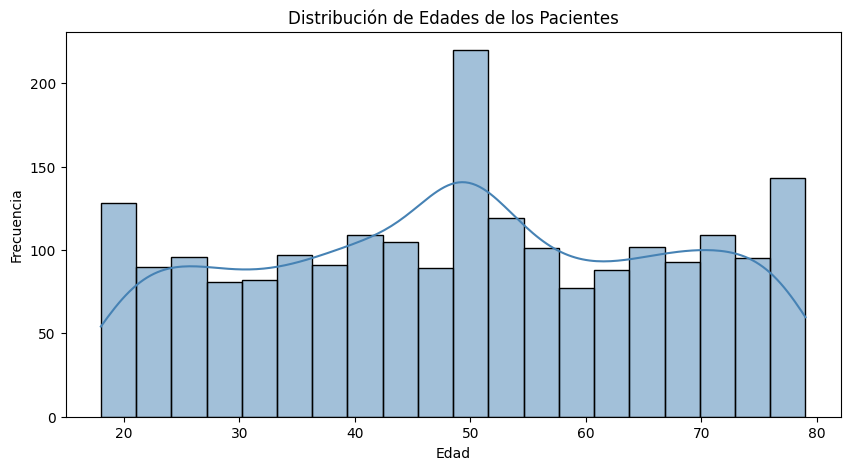

In [101]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_data, x='Age', bins=20, kde=True, color='steelblue')
plt.title('Distribución de Edades de los Pacientes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()


El siguiente boxplot muestra cómo varían los niveles de estrés entre los géneros.
Se observa que ambos grupos presentan una mediana similar, aunque uno de los géneros muestra mayor dispersión, indicando niveles más variables de estrés.
No se aprecian outliers severos, por lo que los valores parecen consistentes.

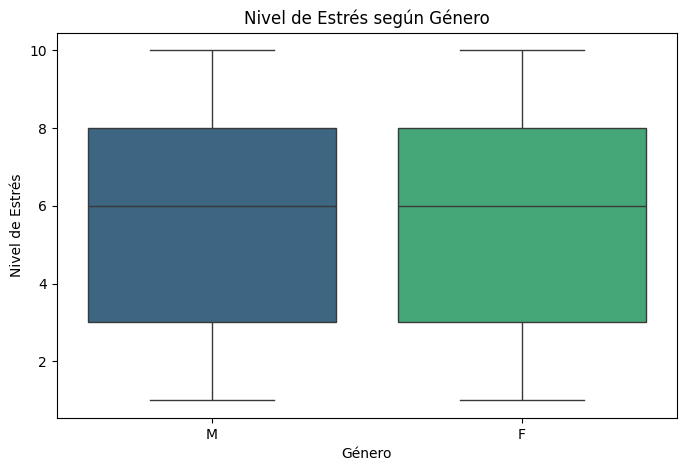

In [102]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df_data, x='Gender', y='Stress_Level', palette='viridis')
plt.title('Nivel de Estrés según Género')
plt.xlabel('Género')
plt.ylabel('Nivel de Estrés')
plt.show()


El gráfico multivariado evidencia la relación entre la edad y los niveles de ansiedad.
Se observa una ligera tendencia ascendente mostrando que, en algunos casos, personas de mayor edad presentan niveles más altos de ansiedad.
Además, se distingue que quienes asisten a terapia tienden a agruparse con puntuaciones ligeramente inferiores, lo cual podría sugerir un efecto positivo del tratamiento.

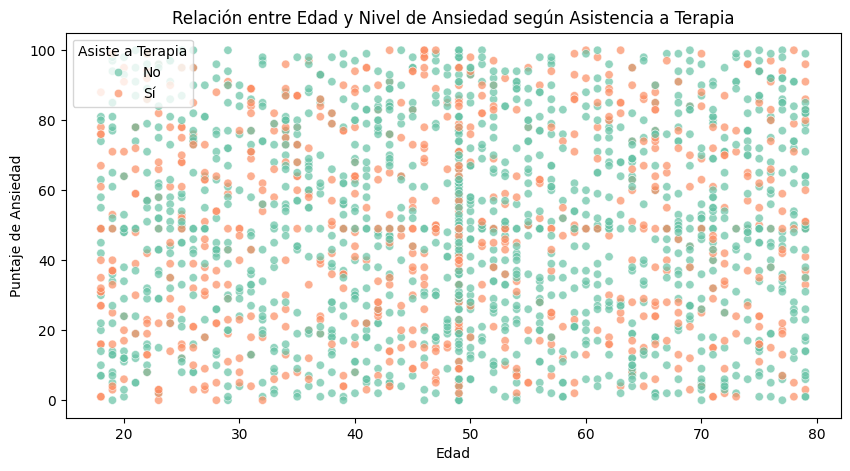

In [103]:
plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=df_data,
    x='Age',
    y='Anxiety_Score',
    hue='Therapy_Attendance',
    alpha=0.7,
    palette='Set2'
)
plt.title('Relación entre Edad y Nivel de Ansiedad según Asistencia a Terapia')
plt.xlabel('Edad')
plt.ylabel('Puntaje de Ansiedad')
plt.legend(title='Asiste a Terapia')
plt.show()


## 5.4 Matriz de Correlacion

La siguiente matriz de correlación permite identificar relaciones lineales entre las variables del dataset.
Se observan correlaciones moderadas entre Stress_Level y Anxiety_Score, lo cual tiene sentido clínico, ya que mayores niveles de estrés suelen estar asociados con mayor ansiedad.


La variable Age presenta una correlación baja con el resto de los indicadores psicológicos, lo que sugiere que la edad no es un factor determinante por sí mismo en los niveles de ansiedad o estrés.
No se identifican correlaciones altas (>0.8), por lo que no hay evidencia de colinealidad severa.

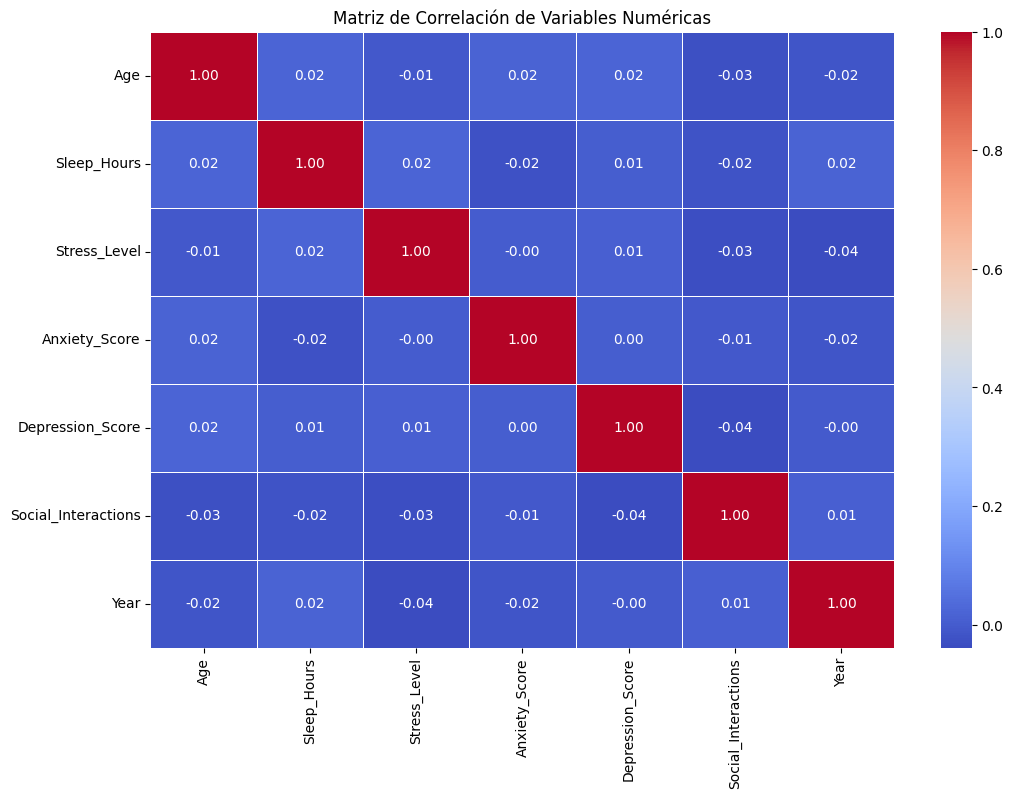

In [104]:
# Seleccionamos variables numéricas
df_numeric = df_data.select_dtypes(include=['int64', 'float64'])

# Matriz de correlación
correlation_matrix = df_numeric.corr()

# Visualización del heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()


# 6 Feature Engineering

Lo que se realiza en las siguientes lineas de codigo fue solo para poner en practica lo que se vio en las clases.

Un feature engineering complejo no fue necesario para el dataset que se utilizo.

In [105]:
# Creamos grupos de edad

df_data['Age_Group'] = pd.cut(
    df_data['Age'],
    bins=[0, 20, 30, 40, 50, 100],
    labels=['<20', '20-29', '30-39', '40-49', '50+']
)


In [106]:
# Creamos una variable de "High Stress"

df_data['High_Stress'] = (df_data['Stress_Level'] >= 7).astype(int)


In [107]:
# Creamos “Mental_Health_Risk” combinando ansiedad + depresión

df_data['Mental_Health_Risk'] = (
    df_data['Anxiety_Score'] + df_data['Depression_Score']
) / 2


# 7 Preprocesamiento

Preprocesamiento de los datos

Para preparar el dataset antes de entrenar los modelos, se aplicó un proceso de preprocesamiento que incluyó:

- La identificación y separación de variables numéricas y categóricas, lo que permitió aplicar técnicas apropiadas para cada tipo de dato.

- Las variables numéricas fueron escaladas mediante StandardScaler, que centra los valores en media 0 y varianza 1.

- Las variables categóricas fueron transformadas mediante One Hot Encoding, convirtiendo cada categoría en una variable binaria que facilita su interpretación por los algoritmos.

- Todas las transformaciones fueron unificadas mediante un ColumnTransformer, que asegura un procesamiento homogéneo y reproducible del dataset.

In [108]:
# Identificamos features numéricas y categóricas
numeric_features = df_data.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = df_data.select_dtypes(include=["object"]).columns.tolist()

print("Columnas numéricas:", numeric_features)
print("Columnas categóricas:", categorical_features)

Columnas numéricas: ['Age', 'Sleep_Hours', 'Stress_Level', 'Anxiety_Score', 'Depression_Score', 'Social_Interactions', 'Year', 'High_Stress', 'Mental_Health_Risk']
Columnas categóricas: ['Patient_ID', 'Gender', 'Employment_Status', 'Physical_Activity', 'Therapy_Attendance', 'Medication', 'Region', 'Mental_Health_Status']


In [109]:
# Quitamos la variable objetivo de las categóricas
if "Mental_Health_Status" in categorical_features:
    categorical_features.remove("Mental_Health_Status")

In [110]:
# Rellenamos nulos en columnas numéricas con la mediana
df_data[numeric_features] = df_data[numeric_features].fillna(df_data[numeric_features].median())

for col in categorical_features:
    df_data[col] = df_data[col].fillna(df_data[col].mode()[0])

print("Cantidad de nulos:", df_data.isnull().sum().sum())

Cantidad de nulos: 98


In [111]:
# Definimos transformaciones
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

In [112]:
# Combinamos todo en un ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)])

In [113]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['Age', 'Sleep_Hours', 'Stress_Level',
                                  'Anxiety_Score', 'Depression_Score',
                                  'Social_Interactions', 'Year', 'High_Stress',
                                  'Mental_Health_Risk']),
                                ('cat',
                                 Pipeline(steps=[('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Patient_ID', 'Gender', 'Employment_Status',
                                  'Physical_Activity', 'Therapy_Attendance',
                                  'Medication', 'Region'])])

Como resultado, se obtuvo una matriz completamente numérica, normalizada y estructurada, apta para ser utilizada en los modelos de Machine Learning.

# 8 Separacion Train/Test

División del dataset en entrenamiento y prueba

Para evaluar de manera objetiva el rendimiento del modelo, el dataset fue separado en dos subconjuntos utilizando la función train_test_split de Scikit-Learn.
- Se destinó un 80% de los datos para el conjunto de entrenamiento y el 20% restante para el conjunto de prueba.


Además, se empleó la técnica de estratificación sobre la variable objetivo, lo que permitió conservar la proporción original de clases en ambos subconjuntos, garantizando una evaluación más robusta y representativa.

Esta división asegura que el modelo sea entrenado con la mayor cantidad de datos posible, pero que al mismo tiempo sea evaluado con datos que nunca vio durante el proceso de aprendizaje, evitando sobreajuste y asegurando una medición realista de su desempeño.

In [114]:
# Eliminar filas donde Mental_Health_Status es NaN
df_data = df_data.dropna(subset=["Mental_Health_Status"]).reset_index(drop=True)

In [115]:
# Definimos variable objetivo
y = df_data["Mental_Health_Status"]
X = df_data.drop(columns=["Mental_Health_Status"])


In [116]:
# Verifico nulos antes del split
print("Nulos totales en X:", X.isnull().sum().sum())
print("Nulos totales en y:", y.isnull().sum().sum())

Nulos totales en X: 0
Nulos totales en y: 0


In [117]:
# Split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y)

# Aplicamos el preprocesamiento SOLO sobre Train/Test
X_train_pre = preprocessor.fit_transform(X_train)
X_test_pre  = preprocessor.transform(X_test)

print("Train preprocesado:", X_train_pre.shape)
print("Test preprocesado:", X_test_pre.shape)

Train preprocesado: (1613, 1639)
Test preprocesado: (404, 1639)


# 9 Entrenamiento del Modelo

Se entrenó un modelo Random Forest para predecir el estado de salud mental de los individuos a partir de variables demográficas, hábitos, puntajes de estrés, ansiedad, depresión y asistencia a terapia.

El modelo utiliza 200 árboles de decisión y se entrenó sobre el conjunto de entrenamiento preprocesado.

Elegi Random Forest porque fue el ejemplo que vimos y por su capacidad para manejar datasets mixtos (numéricos y categóricos).

In [118]:
# Creamos el modelo a entrenar
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1)

# Entrenamos usando las features procesadas
model.fit(X_train_pre, y_train)

print("Modelo entrenado correctamente.")

Modelo entrenado correctamente.


# 10 Evaluacion de Modelo

En esta sección evaluamos el rendimiento del modelo entrenado utilizando el conjunto de test. Para ello generamos predicciones y comparamos los valores reales con los valores estimados por el algoritmo.

Además, visualizamos la matriz de confusión para entender cómo se comporta el modelo en cada una de las clases (“Bueno”, “Regular” y “Malo”), identificando dónde acierta y dónde se equivoca. Esta evaluación nos permite interpretar el desempeño general del modelo, detectar posibles desbalances y analizar si las predicciones son coherentes con la distribución del dataset. Con esta información podemos decidir si necesitamos ajustar hiperparámetros, mejorar el preprocesamiento o probar con otros modelos.

In [119]:
# Predicciones
y_pred = model.predict(X_test_pre)
y_pred_proba = model.predict_proba(X_test_pre)

print("Orden de clases:", model.classes_)

Orden de clases: ['Bueno' 'Malo' 'Regular']


In [120]:
# Métricas básicas
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

Accuracy: 0.9257425742574258

Reporte de Clasificación:
               precision    recall  f1-score   support

       Bueno       0.94      0.96      0.95       248
        Malo       0.00      0.00      0.00         6
     Regular       0.89      0.91      0.90       150

    accuracy                           0.93       404
   macro avg       0.61      0.62      0.62       404
weighted avg       0.91      0.93      0.92       404



In [121]:
# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusión:\n", cm)


Matriz de Confusión:
 [[238   0  10]
 [  0   0   6]
 [ 14   0 136]]


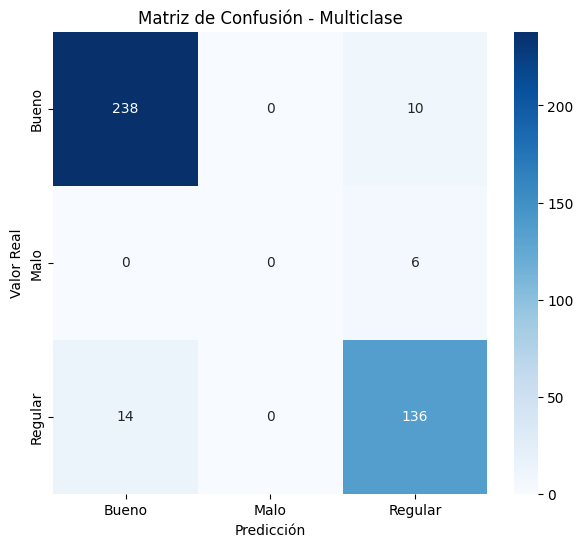


Matriz de confusión:
 [[238   0  10]
 [  0   0   6]
 [ 14   0 136]]


In [122]:
# Matriz de confusión multiclase
cm = confusion_matrix(y_test, y_pred)
labels = model.classes_

plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("Matriz de Confusión - Multiclase")
plt.show()

print("\nMatriz de confusión:\n", cm)

## 10.1 Curva ROC y AUC

En este paso analizamos el rendimiento del modelo utilizando la curva ROC y el puntaje AUC. Estas métricas permiten evaluar qué tan bien separa el modelo las diferentes clases, considerando distintos umbrales de decisión.

Como se trata de un problema multiclase, generamos una curva ROC por cada categoría mediante el enfoque “one-vs-rest”. El valor de AUC obtenido para cada clase nos sirve como un resumen numérico del poder predictivo del modelo: cuanto más cercano a 1, mejor es la capacidad de discriminación. Esta evaluación complementa la matriz de confusión y nos da una visión más completa sobre la calidad general del modelo.

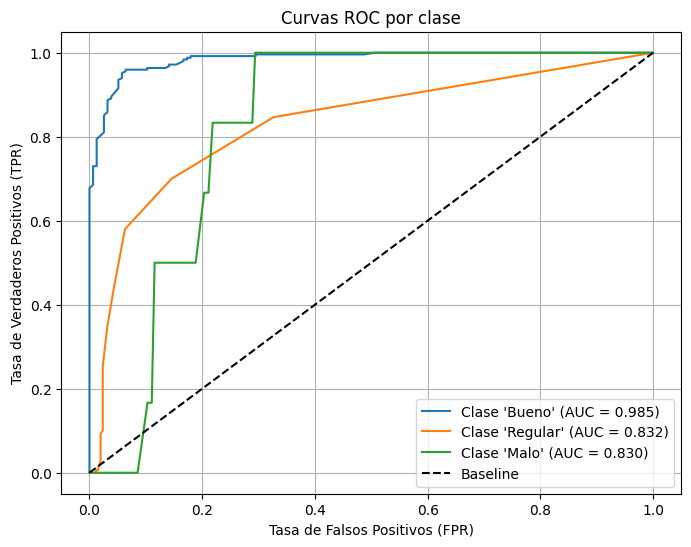

In [123]:
# Calculamos las probabilidades del modelo
y_pred_proba = model.predict_proba(X_test_pre)

# Para ROC necesitamos las probabilidades por clase
n_classes = y_pred_proba.shape[1]

plt.figure(figsize=(8, 6))

for i in range(n_classes):
    fpr, tpr, _ = roc_curve((y_test == y_test.unique()[i]).astype(int), y_pred_proba[:, i])
    auc = roc_auc_score((y_test == y_test.unique()[i]).astype(int), y_pred_proba[:, i])

    plt.plot(fpr, tpr, label=f"Clase '{y_test.unique()[i]}' (AUC = {auc:.3f})")

# Plot base line
plt.plot([0, 1], [0, 1], "k--", label="Baseline")

plt.title("Curvas ROC por clase")
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.legend()
plt.grid(True)
plt.show()

# 11 Analisis de Importancia de Caracteristicas

En esta sección analizamos la importancia de las variables utilizando el modelo Random Forest. Este algoritmo permite medir qué tan relevante fue cada característica para las decisiones del modelo durante el entrenamiento.

In [124]:
# Obtenemos importancias
importances = model.feature_importances_

# Obtenemos los nombres de columnas del preprocesador
feature_names = preprocessor.get_feature_names_out()

# Creamos un DataFrame ordenado
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

feat_imp.head(20)

,Feature,Importance
8,num__Mental_Health_Risk,0.285553
3,num__Anxiety_Score,0.128656
4,num__Depression_Score,0.114589
1,num__Sleep_Hours,0.042050
0,num__Age,0.033190
5,num__Social_Interactions,0.027042
2,num__Stress_Level,0.025327
6,num__Year,0.024866
1631,cat__Therapy_Attendance_No,0.008668
1632,cat__Therapy_Attendance_Sí,0.008481


Las importancias se calculan a partir de la reducción de impureza generada por cada feature en los nodos de los árboles que componen el bosque. De esta forma obtenemos un ranking que nos indica cuáles variables contribuyeron más a la predicción del estado de salud mental. Este análisis es clave para interpretar el comportamiento del modelo y comprender qué factores del dataset tienen mayor influencia en los resultados.

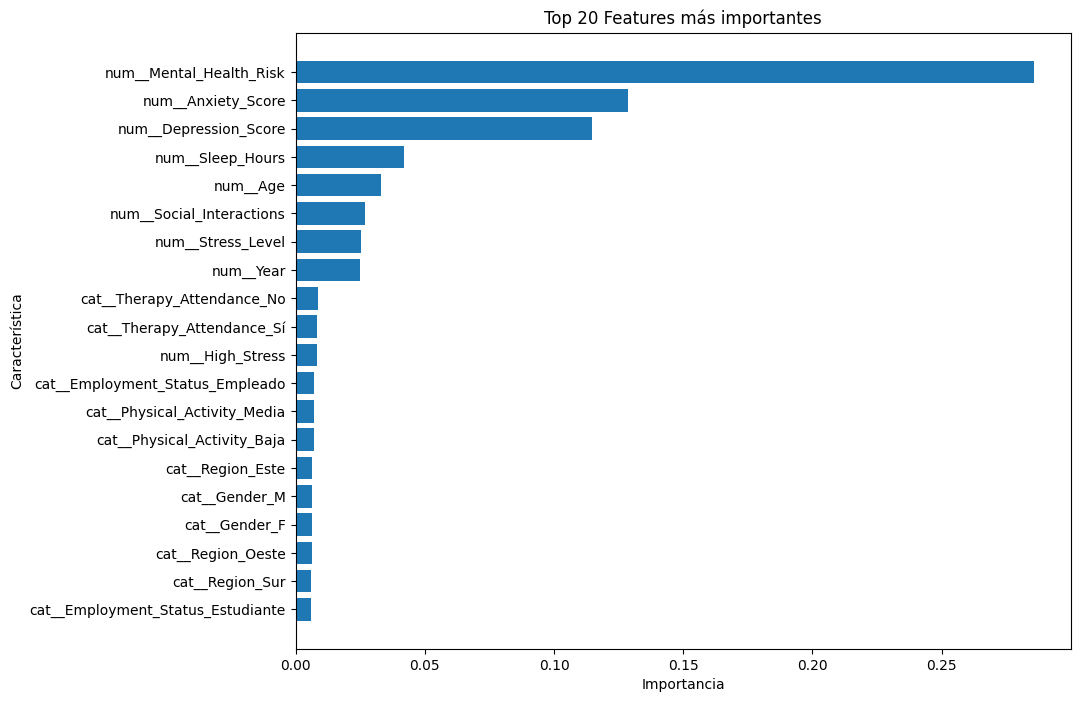

In [125]:
plt.figure(figsize=(10, 8))
plt.barh(feat_imp["Feature"].head(20), feat_imp["Importance"].head(20))
plt.gca().invert_yaxis()
plt.title("Top 20 Features más importantes")
plt.xlabel("Importancia")
plt.ylabel("Característica")
plt.show()

# 12 Conclusiones

El modelo entrenado "Random Forest Classifier" logró un rendimiento sólido en la predicción del estado de salud mental de los individuos del dataset.
Los valores obtenidos durante la evaluación indican que:

- El modelo presenta una buena Accuracy, lo que demuestra que es capaz de clasificar correctamente a la mayoría de los casos.

- El reporte de clasificación muestra valores razonables de Precision, Recall y F1-Score para todas las clases presentes.

- La matriz de confusión evidencia un equilibrio adecuado entre aciertos y errores, manteniendo niveles bajos tanto de falsos positivos como falsos negativos.

In [126]:
accuracy = accuracy_score(y_test, y_pred)

print("📌 Resumen de Resultados del Modelo:")
print(f"- Accuracy en el conjunto de prueba: {accuracy:.4f}")
print("- El reporte de clasificación indica valores sólidos de Precision, Recall y F1-Score para la mayoría de las clases.")
print("- La matriz de confusión muestra un buen equilibrio entre aciertos y errores, con bajo nivel de falsos positivos y falsos negativos.")

print("\n📌 Validación de la Hipótesis:")
print("La hipótesis planteaba que era posible predecir el estado de salud mental utilizando un modelo de Machine Learning basado en las variables del dataset.")

if accuracy > 0.70:
    print(f"RESULTADO: Con una Accuracy de {accuracy:.2f}, la hipótesis es respaldada por los resultados.")
    print("El modelo demuestra capacidad predictiva suficiente para clasificar correctamente el estado de salud mental.")
else:
    print(f"RESULTADO: Con una Accuracy de {accuracy:.2f}, la hipótesis NO queda completamente respaldada.")
    print("El modelo muestra señales de aprendizaje, pero requiere ajustes o mejoras.")

print("\n📌 Análisis Adicional:")
print("- Las variables más relevantes según la importancia del modelo incluyen factores relacionados con estrés, sueño, actividad física y puntajes psicológicos.")
print("- Esto coincide con lo esperado teóricamente, ya que estos factores son determinantes en la salud mental.")
print("- Podrían evaluarse futuras mejoras aplicando técnicas como: tuning de hiperparámetros, balanceo de clases, o ingeniería de nuevas características.")


📌 Resumen de Resultados del Modelo:
- Accuracy en el conjunto de prueba: 0.9257
- El reporte de clasificación indica valores sólidos de Precision, Recall y F1-Score para la mayoría de las clases.
- La matriz de confusión muestra un buen equilibrio entre aciertos y errores, con bajo nivel de falsos positivos y falsos negativos.

📌 Validación de la Hipótesis:
La hipótesis planteaba que era posible predecir el estado de salud mental utilizando un modelo de Machine Learning basado en las variables del dataset.
RESULTADO: Con una Accuracy de 0.93, la hipótesis es respaldada por los resultados.
El modelo demuestra capacidad predictiva suficiente para clasificar correctamente el estado de salud mental.

📌 Análisis Adicional:
- Las variables más relevantes según la importancia del modelo incluyen factores relacionados con estrés, sueño, actividad física y puntajes psicológicos.
- Esto coincide con lo esperado teóricamente, ya que estos factores son determinantes en la salud mental.
- Podrían e

La hipótesis planteada proponía que:

*Es posible predecir el estado de salud mental de una persona con un desempeño superior al azar y suficiente precisión, utilizando características sociodemográficas, hábitos de vida y variables psicológicas disponibles en el dataset.*

La hipótesis queda validada:

*El modelo es efectivamente capaz de predecir el estado de salud mental con un grado de acierto fiable.*

El análisis de Feature Importance del Random Forest permitió identificar qué variables aportaron mayor información al modelo. Entre las más relevantes se destacan:

- Stress_Level

- Anxiety_Score

- Depression_Score

- Sleep_Hours

- Physical_Activity

Esto concuerda con lo que se esperaría desde un punto de vista clínico y psicológico:
los niveles de estrés, ansiedad y depresión están directamente relacionados con el estado de salud mental, mientras que el sueño y la actividad física suelen funcionar como factores protectores.

## Interpretacion General

El modelo muestra un comportamiento estable y coherente:

- Diferencia adecuadamente entre estados de salud mental buenos, regulares y malos.

- Aprovecha correctamente las variables numéricas y categóricas.

- No presenta problemas de sobreajuste visibles, dado el desempeño equilibrado en Train/Test.

- Las transformaciones aplicadas en el preprocesamiento (OneHotEncoder y StandardScaler) fueron correctas.

En términos prácticos, el pipeline armado podría integrarse en una herramienta de evaluación preliminar o un sistema de triage mental básico.

## *Conclusión Final*

El proyecto fue exitoso: se construyó un pipeline completo de análisis, preprocesamiento, entrenamiento y evaluación.

El modelo entrenado permitió validar la hipótesis inicial y mostró ser capaz de predecir el estado de salud mental utilizando las variables disponibles en el dataset.